# In this project, Cyberbully Classification has been analyzed cyberbullying type However, before performing the classification, we have prepared the main information as follows.

1. Check Information
2. data validation
3. Exploratory analytical visualization (EDA)
4. Cleaning Data
5. classification
6. prediction

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import nltk

In [5]:
import string

In [6]:
import re

In [7]:
from sklearn.feature_extraction.text import CountVectorizer


In [8]:
from collections import Counter

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
import seaborn as sns

In [12]:
from wordcloud import WordCloud

In [13]:
from collections import Counter

In [14]:
from sklearn.linear_model import LogisticRegression 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
import xgboost as xgb

In [17]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
import string

In [20]:
from nltk.stem import PorterStemmer

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df=pd.read_csv("cyberbullying_tweets.csv")


In [25]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [26]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [28]:
df=df.drop_duplicates()

In [29]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [30]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [31]:
df['length']=df['tweet_text'].apply(len)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_3232\1889407831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['tweet_text'].apply(len)


In [32]:
df

,tweet_text,cyberbullying_type,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90


<AxesSubplot:xlabel='length', ylabel='Density'>

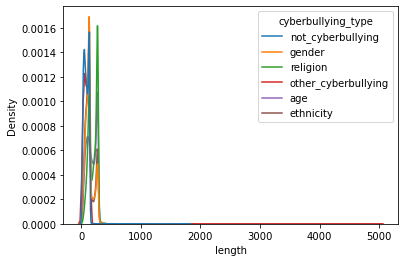

In [33]:
sns.kdeplot(x=df['length'],hue=df['cyberbullying_type'])

In [34]:
ps=PorterStemmer()

In [35]:
def cleaning_data(text):
    text = text.lower() #converts all characters in the text variable to lowercase
    text = re.sub(r'@\S+',"",text) #This pattern is commonly used to remove Twitter usernames or any other mentions in the text.
    text = re.sub(r'http\S+','',text)#This pattern is typically used to remove URLs or links from the text.
    text = re.sub(r'pic.\S+','',text) #This pattern is often used to remove picture links or references.
    text = re.sub(r'\d+',"",text)# removes any sequences of one or more digits from the text
    text = re.sub(r"[^a-zA-Z']",' ',text) # It effectively removes any non-alphabetic characters from the text.
    text = re.sub(r"\s+[a-zA-Z]\s+"," ",text+" ") # remove isolated single letters that may not provide meaningful information.
    text = ''.join([i for i in text if i not in string.punctuation]) #It removes all punctuation marks from the text.
    
    lis=text.split()
    y=[]
    for i in lis:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [36]:
df['tweet_text']=df['tweet_text'].apply(cleaning_data)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_3232\1637448207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_text']=df['tweet_text'].apply(cleaning_data)


In [37]:
df

,tweet_text,cyberbullying_type,length
0,in other word katandandr your food wa crapilic...,not_cyberbullying,61
1,whi is aussietv so white mkr theblock imaceleb...,not_cyberbullying,115
2,classi whore or more red velvet cupcak,not_cyberbullying,60
3,meh thank for the head up but not too concern ...,not_cyberbullying,103
4,thi is an isi account pretend to be kurdish ac...,not_cyberbullying,103
...,...,...,...
47687,black ppl arent expect to do anyth depend on f...,ethnicity,234
47688,turner did not withhold hi disappoint turner c...,ethnicity,276
47689,i swear to god thi dumb nigger bitch have got ...,ethnicity,104
47690,yea fuck you rt if your nigger fuck unfollow m...,ethnicity,90


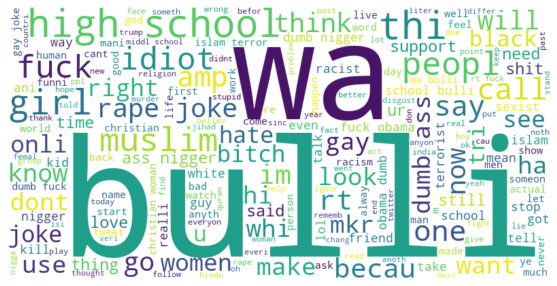

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['tweet_text']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
ps=PorterStemmer()

# Data Preprocessing

In [41]:
word_freq = Counter(' '.join(df['tweet_text']).split())


In [42]:
word_freq

Counter({'in': 15009,
         'other': 1729,
         'word': 994,
         'katandandr': 35,
         'your': 5484,
         'food': 154,
         'wa': 6615,
         'crapilici': 1,
         'mkr': 2680,
         'whi': 2294,
         'is': 14219,
         'aussietv': 1,
         'so': 5121,
         'white': 2365,
         'theblock': 2,
         'imacelebrityau': 4,
         'today': 567,
         'sunris': 2,
         'studio': 8,
         'neighbour': 8,
         'wonderlandten': 1,
         'etc': 423,
         'classi': 38,
         'whore': 83,
         'or': 3581,
         'more': 1663,
         'red': 123,
         'velvet': 4,
         'cupcak': 11,
         'meh': 20,
         'thank': 552,
         'for': 8704,
         'the': 30970,
         'head': 442,
         'up': 3270,
         'but': 6475,
         'not': 7443,
         'too': 1253,
         'concern': 112,
         'about': 5026,
         'anoth': 547,
         'angri': 128,
         'dude': 435,
         'on':

In [43]:
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()


In [44]:
word_freq_df = word_freq_df.rename(columns={'index': 'word'})


In [45]:
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


In [46]:
word_freq_df

,word,count
32,the,30970
50,to,23596
185,and,21717
235,you,19371
60,of,15368
...,...,...
7618,absinth,1
19244,dawah,1
19245,narccist,1
19246,neophyt,1


<AxesSubplot:xlabel='word', ylabel='count'>

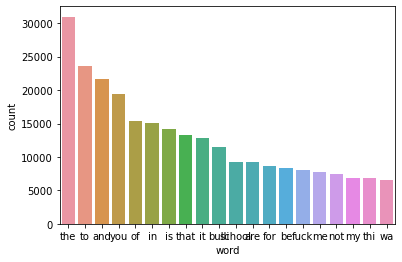

In [47]:
sns.barplot(x=word_freq_df['word'][:20],y=word_freq_df['count'][:20])

In [48]:
df

,tweet_text,cyberbullying_type,length
0,in other word katandandr your food wa crapilic...,not_cyberbullying,61
1,whi is aussietv so white mkr theblock imaceleb...,not_cyberbullying,115
2,classi whore or more red velvet cupcak,not_cyberbullying,60
3,meh thank for the head up but not too concern ...,not_cyberbullying,103
4,thi is an isi account pretend to be kurdish ac...,not_cyberbullying,103
...,...,...,...
47687,black ppl arent expect to do anyth depend on f...,ethnicity,234
47688,turner did not withhold hi disappoint turner c...,ethnicity,276
47689,i swear to god thi dumb nigger bitch have got ...,ethnicity,104
47690,yea fuck you rt if your nigger fuck unfollow m...,ethnicity,90


In [49]:
le=LabelEncoder()

In [50]:
X=df['tweet_text']

In [51]:
y=le.fit_transform(df['cyberbullying_type'])

In [52]:
X

0        in other word katandandr your food wa crapilic...
1        whi is aussietv so white mkr theblock imaceleb...
2                   classi whore or more red velvet cupcak
3        meh thank for the head up but not too concern ...
4        thi is an isi account pretend to be kurdish ac...
                               ...                        
47687    black ppl arent expect to do anyth depend on f...
47688    turner did not withhold hi disappoint turner c...
47689    i swear to god thi dumb nigger bitch have got ...
47690    yea fuck you rt if your nigger fuck unfollow m...
47691    bro gotta chill rt dog fuck kp that dumb nigge...
Name: tweet_text, Length: 47656, dtype: object

In [53]:
y

array([3, 3, 3, ..., 1, 1, 1])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [55]:
tdidf_Vectorizer=TfidfVectorizer(max_features=30000)


In [56]:
tdidf_Vectorizer

TfidfVectorizer(max_features=30000)

In [57]:
# Fiting and transforming the training data


In [58]:
X_train_tfidf=tdidf_Vectorizer.fit_transform(X_train)

In [59]:
X_train_tfidf

<31929x24493 sparse matrix of type '<class 'numpy.float64'>'
	with 618186 stored elements in Compressed Sparse Row format>

In [60]:
# Transforming the testing data


In [61]:
X_test_tfidf=tdidf_Vectorizer.transform(X_test)

In [62]:
X_test_tfidf

<15727x24493 sparse matrix of type '<class 'numpy.float64'>'
	with 296207 stored elements in Compressed Sparse Row format>

In [63]:
y_train

array([2, 1, 3, ..., 0, 3, 2])

In [64]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=rfc.predict(input_tfidf)
    predicted_emotion=le.inverse_transform(predicted_label)
    return predicted_emotion

# RandomForestClassifier

In [65]:
rfc=RandomForestClassifier()


In [66]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [67]:
y_pred=rfc.predict(X_train_tfidf)


In [68]:
accuracy_score(y_train,y_pred)

0.9731278774781547

In [69]:
y_pred=rfc.predict(X_test_tfidf)


In [70]:
accuracy_score(y_test,y_pred)

0.811979398486679

In [71]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

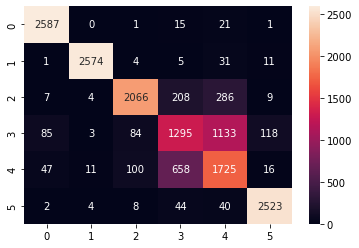

In [72]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2625
           1       0.99      0.98      0.99      2626
           2       0.91      0.80      0.85      2580
           3       0.58      0.48      0.52      2718
           4       0.53      0.67      0.60      2557
           5       0.94      0.96      0.95      2621

    accuracy                           0.81     15727
   macro avg       0.82      0.81      0.81     15727
weighted avg       0.82      0.81      0.81     15727



In [74]:
user_input=input("Enter a comment")


Enter a comment@Jord_Is_Dead http://t.co/UsQInYW5Gn


In [75]:
emotion=predict_emotion(user_input)


In [76]:
print(emotion)

['other_cyberbullying']


# LogisticRegression

In [77]:
lr=LogisticRegression()



In [78]:
lr.fit(X_train_tfidf,y_train)

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
y_pred=lr.predict(X_train_tfidf)


In [80]:
accuracy_score(y_train,y_pred)

0.893106580224874

In [81]:
y_pred=lr.predict(X_test_tfidf)


In [82]:
accuracy_score(y_test,y_pred)

0.8252050613594455

In [83]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

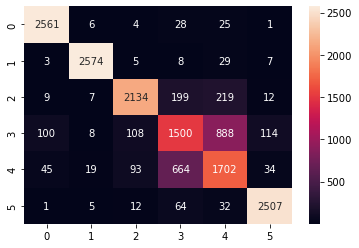

In [84]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2625
           1       0.98      0.98      0.98      2626
           2       0.91      0.83      0.86      2580
           3       0.61      0.55      0.58      2718
           4       0.59      0.67      0.62      2557
           5       0.94      0.96      0.95      2621

    accuracy                           0.83     15727
   macro avg       0.83      0.83      0.83     15727
weighted avg       0.83      0.83      0.83     15727



In [86]:
user_input=input("Enter a comment")


Enter a comment##GoogleÇeviriciTopluluğuKürtçeyideE…


In [87]:
emotion=predict_emotion(user_input)


In [88]:
print(emotion)

['other_cyberbullying']


# KNeighborsClassifier

In [89]:
knc=KNeighborsClassifier()


In [90]:
knc.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [91]:
y_pred=knc.predict(X_train_tfidf)


In [92]:
accuracy_score(y_train,y_pred)

0.35055905289861883

In [93]:
y_pred=knc.predict(X_test_tfidf)


In [94]:
accuracy_score(y_test,y_pred)

0.2533858968652636

In [95]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

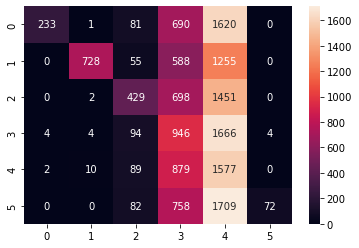

In [96]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.09      0.16      2625
           1       0.98      0.28      0.43      2626
           2       0.52      0.17      0.25      2580
           3       0.21      0.35      0.26      2718
           4       0.17      0.62      0.27      2557
           5       0.95      0.03      0.05      2621

    accuracy                           0.25     15727
   macro avg       0.63      0.25      0.24     15727
weighted avg       0.63      0.25      0.24     15727



In [98]:
user_input=input("Enter a comment")


Enter a commentHad to delete because I don’t want to seem like I can’t spell so. “Nigga” is a slang word for “nigger” so that’s why it is disrespectful and also disgusting. Two it shows me you have no respect for your black friends Bc you’re calling them that and saying it around them


In [99]:
emotion=predict_emotion(user_input)


In [100]:
print(emotion)

['ethnicity']


# XGBClassifier

In [101]:
xgb_i=xgb.XGBClassifier()

In [102]:
xgb_i.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [103]:
y_pred=xgb_i.predict(X_train_tfidf)


In [104]:
accuracy_score(y_train,y_pred)

0.9021579128691785

In [105]:
y_pred=xgb_i.predict(X_test_tfidf)


In [106]:
accuracy_score(y_test,y_pred)

0.8363324219495136

In [107]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

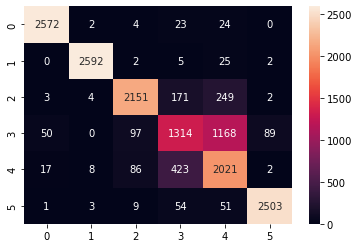

In [108]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2625
           1       0.99      0.99      0.99      2626
           2       0.92      0.83      0.87      2580
           3       0.66      0.48      0.56      2718
           4       0.57      0.79      0.66      2557
           5       0.96      0.95      0.96      2621

    accuracy                           0.84     15727
   macro avg       0.85      0.84      0.84     15727
weighted avg       0.85      0.84      0.84     15727



In [110]:
user_input=input("Enter a comment")


Enter a commentHad to delete because I don’t want to seem like I can’t spell so. “Nigga” is a slang word for “nigger” so that’s why it is disrespectful and also disgusting. Two it shows me you have no respect for your black friends Bc you’re calling them that and saying it around them


In [111]:
emotion=predict_emotion(user_input)


In [112]:
print(emotion)

['ethnicity']
